# The CODATA-RDA Research Data Science Advanced Workshops on Bio-informatics, Climate Data Sciences, Extreme sources of data and Internet of Things (IoT)/Big-Data Analytics | (smr 3257)


## Hands on Climate data analysis

In this hands on tutorial we will learn how to use python language along with python packages to access ESGF site data, download them, perform simple analysis and plot results.

First thing we have to start a jupyter notebook.

Type:

source /home/netapp-clima/users/ggiulian/minter-18.sh

jupyter notebook

in a terminal and wait for the browswer to startup. Open a new notebook. Now you can start typing in the python code and see it executed.

### WAIT, WAIT, WAIT !!! I want it on my OS/system/Washing machine !!

This is not a real problem, as long as you can keep in mind this site:

https://conda.io/

Just follow the tutorial on how to install conda on your combination of system/OS

BUT PLEASE, DO NOT DO IT RIGH NOW!

The installation will require lot of time in between download, install, update, etc.
If you trust me, all should work. :)

### Required packages

On the ICTP desktop systems we have a python distribution with the following installed packages:

* pyesgf
* netCDF4
* xarray
* matplotlib
* basemap
* cdo

Let us now start the tutorial in the jupyter comman line.

### Download data using the PyESGF library

The pyesgf library allows for a search to be pushed to one ESGF server, and if the user is logged in with her OpenID credentials he can readily access the CMIP5 data from the node which has a coopy of the dataset.

Let us start by connecting on one of the ESGF nodes. We go for the German DKRZ one, which is physically the nearest to the ICTP.

You can have a direct look at the web search interface here:

https://esgf-data.dkrz.de/search/esgf-dkrz

All passages you can do with the web interface can be replicated in the python interface.

The connection is like this:


In [1]:
from pyesgf.search import SearchConnection

conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True)

The connection get us an handler we can use to create a new search context. This step does not require us to have an OpenID account. So, now that we have the connection, we can submit a search request:

In [2]:
ctx = conn.new_context(project='CMIP5',
                       model='HadGEM2-ES',
                       experiment='historical',
                       realm='atmos',
                       time_frequency='day',
                       ensemble='r1i1p1',
                       latest=True)
print('Hits:'+repr(ctx.hit_count))
print('Variables:',(ctx.facet_counts['variable']))

Hits:4
Variables: {'zg': 2, 'wap500': 2, 'vas': 2, 'uas': 2, 'tasmin': 2, 'tasmax': 2, 'tas': 2, 'ta700': 2, 'sfcWindmax': 2, 'sfcWind': 2, 'rsutcs': 2, 'rsut': 2, 'rsuscs': 2, 'rsus': 4, 'rsdt': 2, 'rsdscs': 2, 'rsds': 4, 'rlutcs': 2, 'rlut': 4, 'rlus': 4, 'rldscs': 2, 'rlds': 4, 'rhsmin': 2, 'rhsmax': 2, 'rhs': 2, 'psl': 2, 'ps': 2, 'prsn': 2, 'prc': 4, 'pr': 2, 'pctisccp': 2, 'parasolRefl': 2, 'huss': 2, 'hfss': 4, 'hfls': 4, 'clwvi': 2, 'cltisccp': 2, 'cltcalipso': 2, 'clt': 4, 'clmcalipso': 2, 'cllcalipso': 2, 'clivi': 2, 'clhcalipso': 2, 'cct': 2, 'ccb': 2, 'albisccp': 2}


The result shows that we have three hits, with a long list of variables. We can in turn get the list of files, and the list of OpenDAP URL for the files:

In [3]:
ds = ctx.search()[1]
files = ds.file_context().search()
odap_urls = []
for f in files:
    odap_urls.append(f.opendap_url)
    print(f.download_url)

http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/clt/clt_day_HadGEM2-ES_historical_r1i1p1_19491201-19591130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/clt/clt_day_HadGEM2-ES_historical_r1i1p1_19591201-19691130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/clt/clt_day_HadGEM2-ES_historical_r1i1p1_19691201-19791130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/clt/clt_day_HadGEM2-ES_historical_r1i1p1_19791201-19891130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/clt/clt_day_HadGEM2-ES_historical_r1i1p1_19891201-19991130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/clt/clt_day_HadGEM

http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/prc/prc_day_HadGEM2-ES_historical_r1i1p1_19691201-19791130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/prc/prc_day_HadGEM2-ES_historical_r1i1p1_19791201-19891130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/prc/prc_day_HadGEM2-ES_historical_r1i1p1_19891201-19991130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/prc/prc_day_HadGEM2-ES_historical_r1i1p1_19991201-20051130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/prsn/prsn_day_HadGEM2-ES_historical_r1i1p1_19491201-19591130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/prsn/prsn_day_Ha

http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/rlus/rlus_day_HadGEM2-ES_historical_r1i1p1_19591201-19691130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/rlus/rlus_day_HadGEM2-ES_historical_r1i1p1_19691201-19791130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/rlus/rlus_day_HadGEM2-ES_historical_r1i1p1_19791201-19891130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/rlus/rlus_day_HadGEM2-ES_historical_r1i1p1_19891201-19991130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/rlus/rlus_day_HadGEM2-ES_historical_r1i1p1_19991201-20051130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/rlut/rlu

http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/tas/tas_day_HadGEM2-ES_historical_r1i1p1_19191201-19291130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/tas/tas_day_HadGEM2-ES_historical_r1i1p1_19291201-19391130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/tas/tas_day_HadGEM2-ES_historical_r1i1p1_19391201-19491130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/tas/tas_day_HadGEM2-ES_historical_r1i1p1_19491201-19591130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/tas/tas_day_HadGEM2-ES_historical_r1i1p1_19591201-19691130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/tas/tas_day_HadGEM

http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/vas/vas_day_HadGEM2-ES_historical_r1i1p1_19991201-20051130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/zg/zg_day_HadGEM2-ES_historical_r1i1p1_19801201-19851130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/zg/zg_day_HadGEM2-ES_historical_r1i1p1_19851201-19901130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/zg/zg_day_HadGEM2-ES_historical_r1i1p1_19901201-19951130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/zg/zg_day_HadGEM2-ES_historical_r1i1p1_19951201-20001130.nc
http://esgf2.dkrz.de/thredds/fileServer/cmip5/output1/MOHC/HadGEM2-ES/historical/day/atmos/day/r1i1p1/v20120716/zg/zg_day_HadGEM2-ES_histo

### Downloading the data

To actually download the data, we are required to have an OpenID registered in the ESGF enabled to access CMIP5 outputs.

Let us go at: https://esgf-data.dkrz.de/user/add/

to register a new account. After the account is registered, we can then request to join one of the projects to be allowed to access the datasets. People that think they will need acces to climate model datasets, can create their OpenID and proceed with uncommenting the below snippets.

All the others, please just folllow through the code to understand what is happening.

With the OpenID and our password we can login into the Earth System Grid using the LogonManager:

In [4]:
from pyesgf.logon import LogonManager

myid = 'https://esgf-node.llnl.gov/esgf-idp/openid/XXXXX'
mypass = 'XXXXXXXXXXXX'

try:
    lm = LogonManager()
    lm.logon_with_openid(myid,mypass)
    am_i_logged = lm.is_logged_on()
except:
    am_i_logged = False


### Batch download

To batch download, we can save the script created by the ESGF in a local file. We can then create a subprocess to run the script and download all the data.

Why it is commented:

* The below code works, but will require high bandwidth to download all the data.
* Remember what is the bottleneck with Climate Data?
* Never mind, you can enable/disable it with the do_batch_download logical flag


In [5]:
do_batch_download = False

if am_i_logged and do_batch_download:

    import os
    
    os.chdir('/scratch/'+os.getenv('USER'))
    fc = ds.file_context()
    wget_script_content = fc.get_download_script()
    script_name = 'download.sh'
    with open(script_name, "w") as writer:
        writer.write(wget_script_content)
    os.chmod(script_name, 755)
    
    import subprocess
    
    subprocess.check_output(["./%s" % script_name])

### File open using OpenDAP

Using the OpenDap link, we can access data by filename.

We will here search for temperature data in the time range 1999-2005.

In [6]:
def mysearch(ul,var,d1,d2):
    import re
    res = []
    string_search = var+'_.*?'+'_'+d1+".*?"+d2+".*?.nc"
    pattern = re.compile(string_search)
    for e in ul:
        match = re.search(pattern,e)
        if match:
            res.append(e)
    return res

if am_i_logged:
    from netCDF4 import Dataset
    myurl = mysearch(odap_urls,'tas','1999','2005')
    tasfile = Dataset(myurl[0])
    tasfile.variables['tas']
else:
    print('You are not logged on the ESGF with your OpenID. Go ahead and use a local copy')

You are not logged on the ESGF with your OpenID. Go ahead and use a local copy


### Opening local copy of the data

Yep. This is where you will fall if you do not have an OpenID. We have a local copy of the above data.

Let us open it using the xarray package.


In [7]:
import os
import xarray

CMIP_directory = '/home/esp-shared-a/GlobalModels/CMIP5/daily/historical/HadGEM2-ES'
CMIP_file = 'tas_day_HadGEM2-ES_historical_r1i1p1_19991201-20051130.nc'

data = xarray.open_dataset(os.path.join(CMIP_directory,CMIP_file))
print(data)

/home/netapp-clima/users/ggiulian/minter-18/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/netapp-clima/users/ggiulian/minter-18/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 2160)
Coordinates:
  * time       (time) datetime64[ns] 1999-12-01T12:00:00 1999-12-02T12:00:00 ...
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * lon        (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institute_id:           MOHC
    experiment_id:          historical
    source:                 HadGEM2-ES (2009) atmosphere: HadGAM2 (N96L38); o...
    model_id:               HadGEM2-ES
    forcing:                GHG, SA, Oz, LU, Sl, Vl, BC, OC, (GHG = CO2, N2O,...
    parent_experiment_id:   piControl
    parent_experiment_rip: 

/home/netapp-clima/users/ggiulian/minter-18/lib/python3.6/site-packages/xarray/coding/variables.py:66: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy cftime.datetime objects instead, reason:day is out of range for month
  return self.func(self.array[key])


### Access the data

The particular variables in xarray can be access using the handy dot syntax:


In [8]:
surface_temp = data.tas
print(surface_temp)

<xarray.DataArray 'tas' (time: 2160, lat: 145, lon: 192)>
[60134400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1999-12-01T12:00:00 1999-12-02T12:00:00 ...
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 -85.0 -83.75 -82.5 ...
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.12 15.0 ...
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    comment:           daily-mean near-surface (usually, 2 meter) air tempera...
    units:             K
    original_name:     mo: m01s03i236
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2010-11-22T15:34:22Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


Let us now select the valus for just two years, 2000 and 2001:


In [9]:
import cftime
import numpy as np

subset = data.loc[dict(time=slice(cftime.Datetime360Day(2000,1,1), cftime.Datetime360Day(2002,1,1)))]

And let us do a time average of this two years:

In [10]:
surface_temp_mean = xarray.DataArray(np.mean(subset.tas,axis=0))

WOW! Now let us plot this 2 year average on a map:

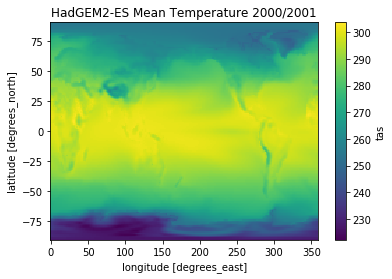

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

surface_temp_mean.plot( )
plt.title('HadGEM2-ES Mean Temperature 2000/2001')
plt.show( )

That was nice. Let us compute and plot the anomaly of this two year average over the 5 year mean data.

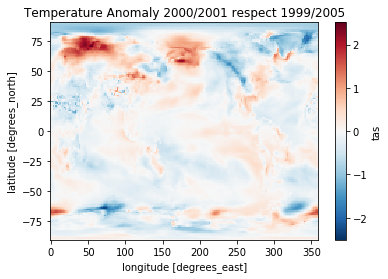

In [12]:
all_temp_mean = xarray.DataArray(np.mean(data.tas,axis=0))

anomaly = surface_temp_mean - all_temp_mean

anomaly.plot( )
plt.title('Temperature Anomaly 2000/2001 respect 1999/2005')
plt.show( )

Let us now load a measure dataset, say the CRU:

http://www.cru.uea.ac.uk/data

and compare it to our five year mean to get the BIAS.

In [13]:
OBS_directory = '/home/esp-shared-a/Observations/CRU/CRU_TS4.00'
OBS_file = 'cru_ts4.00.1901.2015.tmp.dat.nc'

cru = xarray.open_dataset(os.path.join(OBS_directory,OBS_file))
print(cru)

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 720, time: 1380)
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 -178.25 -177.75 -177.25 ...
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 -87.75 -87.25 -86.75 ...
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 1901-03-16 ...
Data variables:
    tmp      (time, lat, lon) float32 ...
    stn      (time, lat, lon) int32 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.00 Mean Temperature
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 1701270849. Data generated from:tmp.1701161043.dtb
    history:      Fri 27 Jan 2017 10:16:26 GMT : User ianharris : Program mak...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      BADC <badc@rl.ac.uk>


Select the same temporal window of the HadGEM2 dataset.

In [14]:
cruwin = cru.loc[dict(time=slice("1999-12-01T00:00:00", "2005-12-01T00:00:00"))]

And now average the data over time. Note that we have also to do a unit of measure change:

In [15]:
print('CRU units : ',cruwin.tmp.units)
print('HadGEM units : ', subset.tas.units)


CRU units :  degrees Celsius
HadGEM units :  K


To convert in Kelvin, we have to add 273.15 K to the temperature in Celsius. We do this and save the data in a temporary file we will us later on for the interpolation using cdo.

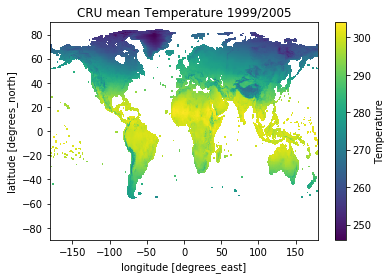

In [16]:
mean_cru = xarray.DataArray(np.mean(cruwin.tmp,axis=0)) + 273.15
mean_cru.to_netcdf('crumean.nc')

mean_cru.name = 'Temperature'
mean_cru.attrs.units = 'K'
mean_cru.plot()
plt.title('CRU mean Temperature 1999/2005')
plt.show( )

Let us resample the CRU grid to the Hadgem one.

In [17]:
import cdo

cdo = cdo.Cdo( )
gdes = "\n".join(cdo.griddes(input=os.path.join(CMIP_directory,CMIP_file)))

with open('grid.des', "w") as writer:
    writer.write(gdes)

remap_file = cdo.remapbil('grid.des', input = 'crumean.nc', output =  'ha_crumean.nc', options = '-f nc')

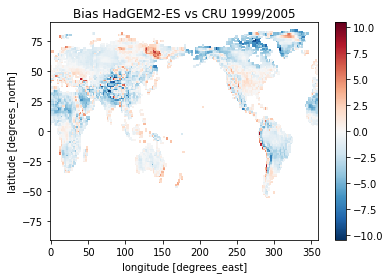

In [18]:
cru_had = xarray.open_dataset(remap_file)
bias = all_temp_mean - cru_had.tmp

bias.plot( )
plt.title('Bias HadGEM2-ES vs CRU 1999/2005')
plt.show( )

Some cleanup....

In [19]:
os.unlink('grid.des')
os.unlink('crumean.nc')
os.unlink('ha_crumean.nc')

Just one more mpte. we could have easiy used also gdal package!

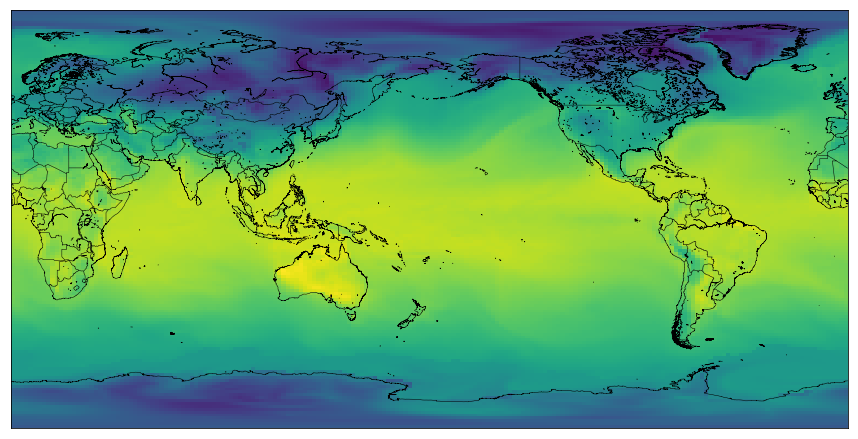

In [36]:
from osgeo import gdal
from mpl_toolkits.basemap import Basemap

ds = gdal.Open(os.path.join(CMIP_directory,CMIP_file))
bnd1 = ds.GetRasterBand(1).ReadAsArray()

fig = plt.figure(figsize=(15,15))  # a new figure window
ax = fig.add_subplot(1, 1, 1)  # specify (nrows, ncols, axnum)
nx = ds.RasterXSize # Raster xsize
ny = ds.RasterYSize # Raster ysize

gt = ds.GetGeoTransform()
proj = ds.GetProjection()

xres = gt[1]
yres = gt[5]

xmin = 0.0 
xmax = 360.0
ymin = -90.0
ymax = 90.0 

map = Basemap(projection='cyl',llcrnrlat=ymin,urcrnrlat=ymax,\
            llcrnrlon=xmin,urcrnrlon=xmax , resolution='i', ax=ax)

map.imshow(bnd1, origin='upper', ax=ax)
map.drawcountries(color='black', linewidth=0.5, ax=ax)
map.drawcoastlines(linewidth=0.5, color='black', ax=ax)


That's All Folks!